This notebook reads the cumlants data and plots them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import glob

In [2]:
#  list of files

f_15 = glob.glob("Cumlants/*s15.hdf5")
f_16 = glob.glob("Cumlants/*s16.hdf5")
f_17 = glob.glob("Cumlants/*s17.hdf5")
f_18 = glob.glob("Cumlants/*s18.hdf5")
f_19 = glob.glob("Cumlants/*s19.hdf5")
f_20 = glob.glob("Cumlants/*s20.hdf5")
f_21 = glob.glob("Cumlants/*s21.hdf5")
f_22 = glob.glob("Cumlants/*s22.hdf5")
f_23 = glob.glob("Cumlants/*s23.hdf5")
f_24 = glob.glob("Cumlants/*s24.hdf5")
f_25 = glob.glob("Cumlants/*s25.hdf5")
f_26 = glob.glob("Cumlants/*s26.hdf5")
f_27 = glob.glob("Cumlants/*s27.hdf5")
f_28 = glob.glob("Cumlants/*s28.hdf5")

In [3]:
f = h5.File(f_17[0], "r")
print(f.keys())
f.close()

<KeysViewHDF5 ['2', '3', '4', '5']>


In [22]:
ref = 'Cum_TNG300-1.hdf5'
# ref = 'Cumlants/DMOnly/DMONLYN1504_s28.hdf5'

In [23]:
# getting cumlants from ref file
ref_f = h5.File(ref, 'r')
Ref_c2 = ref_f['2/DM'][:]
Ref_c3 = ref_f['3/DM'][:]
Ref_c4 = ref_f['4/DM'][:]
Ref_c5 = ref_f['5/DM'][:]

Ref_g_c2 = ref_f['2/Gas'][:]
Ref_g_c3 = ref_f['3/Gas'][:]
Ref_g_c4 = ref_f['4/Gas'][:]
Ref_g_c5 = ref_f['5/Gas'][:]

R_ref = np.linspace((2/2500)*205, 0.1*205, 30)
# R_ref = np.linspace((2/1504)*100*0.677, 0.1*100*0.677, 30)
ref_f.close()

In [6]:
BoxSize = 50*0.677
R = np.linspace((2/752)*BoxSize,0.1*BoxSize,30)

In [7]:
# Each file has 4 groups: 2,3,4,5 
# Store the data corresponding to a given power at a given snap in a master array

Master2_Gas = []
Master3_Gas = []
Master4_Gas = []
Master5_Gas = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    cum2 = []; cum3 = []; cum4 = []; cum5 = []
    for name in z_path:
        # print(name)        
        f = h5.File(name, 'r')
        c2 = f['2/Gas'][:]
        c3 = f['3/Gas'][:]
        c4 = f['4/Gas'][:]
        c5 = f['5/Gas'][:]
        # getting the reduced cumlants from these arrays
        c4_r = c4 - np.power(c2,2)*3
        c5_r = c5 - c3*c2

        cum2.append(c2)
        cum3.append(c3)
        cum4.append(c4_r)
        cum5.append(c5_r)
        f.close()
    Master2_Gas.append(cum2)
    Master3_Gas.append(cum3)
    Master4_Gas.append(cum4)
    Master5_Gas.append(cum5)

In [8]:
# Each file has 4 groups: 2,3,4,5 
# Store the data corresponding to a given power at a given snap in a master array

Master2_DM = []
Master3_DM = []
Master4_DM = []
Master5_DM = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    cum2 = []; cum3 = []; cum4 = []; cum5 = []
    for name in z_path:
        f = h5.File(name, 'r')
        c2 = f['2/DM'][:]
        c3 = f['3/DM'][:]
        c4 = f['4/DM'][:]
        c5 = f['5/DM'][:]
        # getting the reduced cumlants from these arrays
        c4_r = c4 - np.power(c2,2)*3
        c5_r = c5 - c3*c2

        cum2.append(c2)
        cum3.append(c3)
        cum4.append(c4_r)
        cum5.append(c5_r)
        f.close()
    Master2_DM.append(cum2)
    Master3_DM.append(cum3)
    Master4_DM.append(cum4)
    Master5_DM.append(cum5)

In [9]:
np.shape(Master2_Gas)

(14, 2, 30, 2)

Text(0, 0.5, 'log($\\bar{\\xi_n}$)')

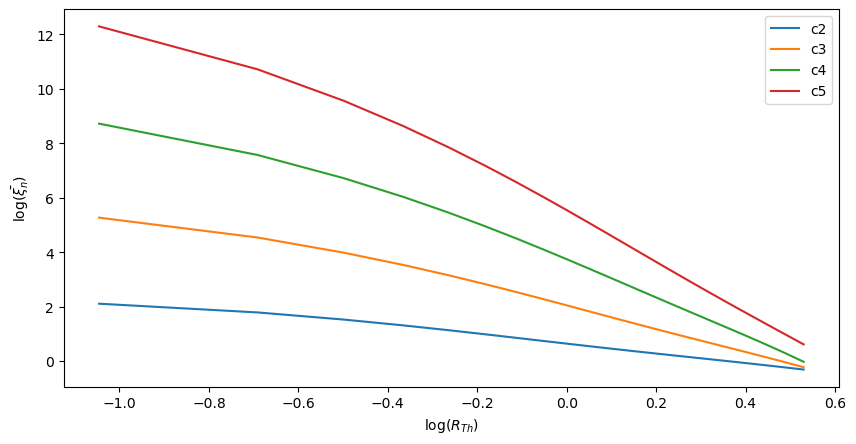

In [53]:
# testting the data by plotting the cumlants at z=0
plt.figure(figsize=(10,5), dpi=100)


# plot only the first column of the data
plt.plot(np.log10(R), np.log10(Master2_Gas[13][0].T[0]), label='c2')
plt.plot(np.log10(R), np.log10(Master3_Gas[13][0].T[0]), label='c3')
plt.plot(np.log10(R), np.log10(Master4_Gas[13][0].T[0]), label='c4')
plt.plot(np.log10(R), np.log10(Master5_Gas[13][0].T[0]), label='c5')
plt.legend()
plt.xlabel('log($R_{Th}$)')
plt.ylabel('log($\\bar{\\xi_n}$)')

In [11]:
# ignoring invalid values encountered in log10
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [12]:
# array of z_vals
z_vals = [2.012, 1.74, 1.49, 1.26, 1.0, 0.87, 0.74, 0.62, 0.5, 0.37, 0.27, 0.18, 0.1, 0.0]

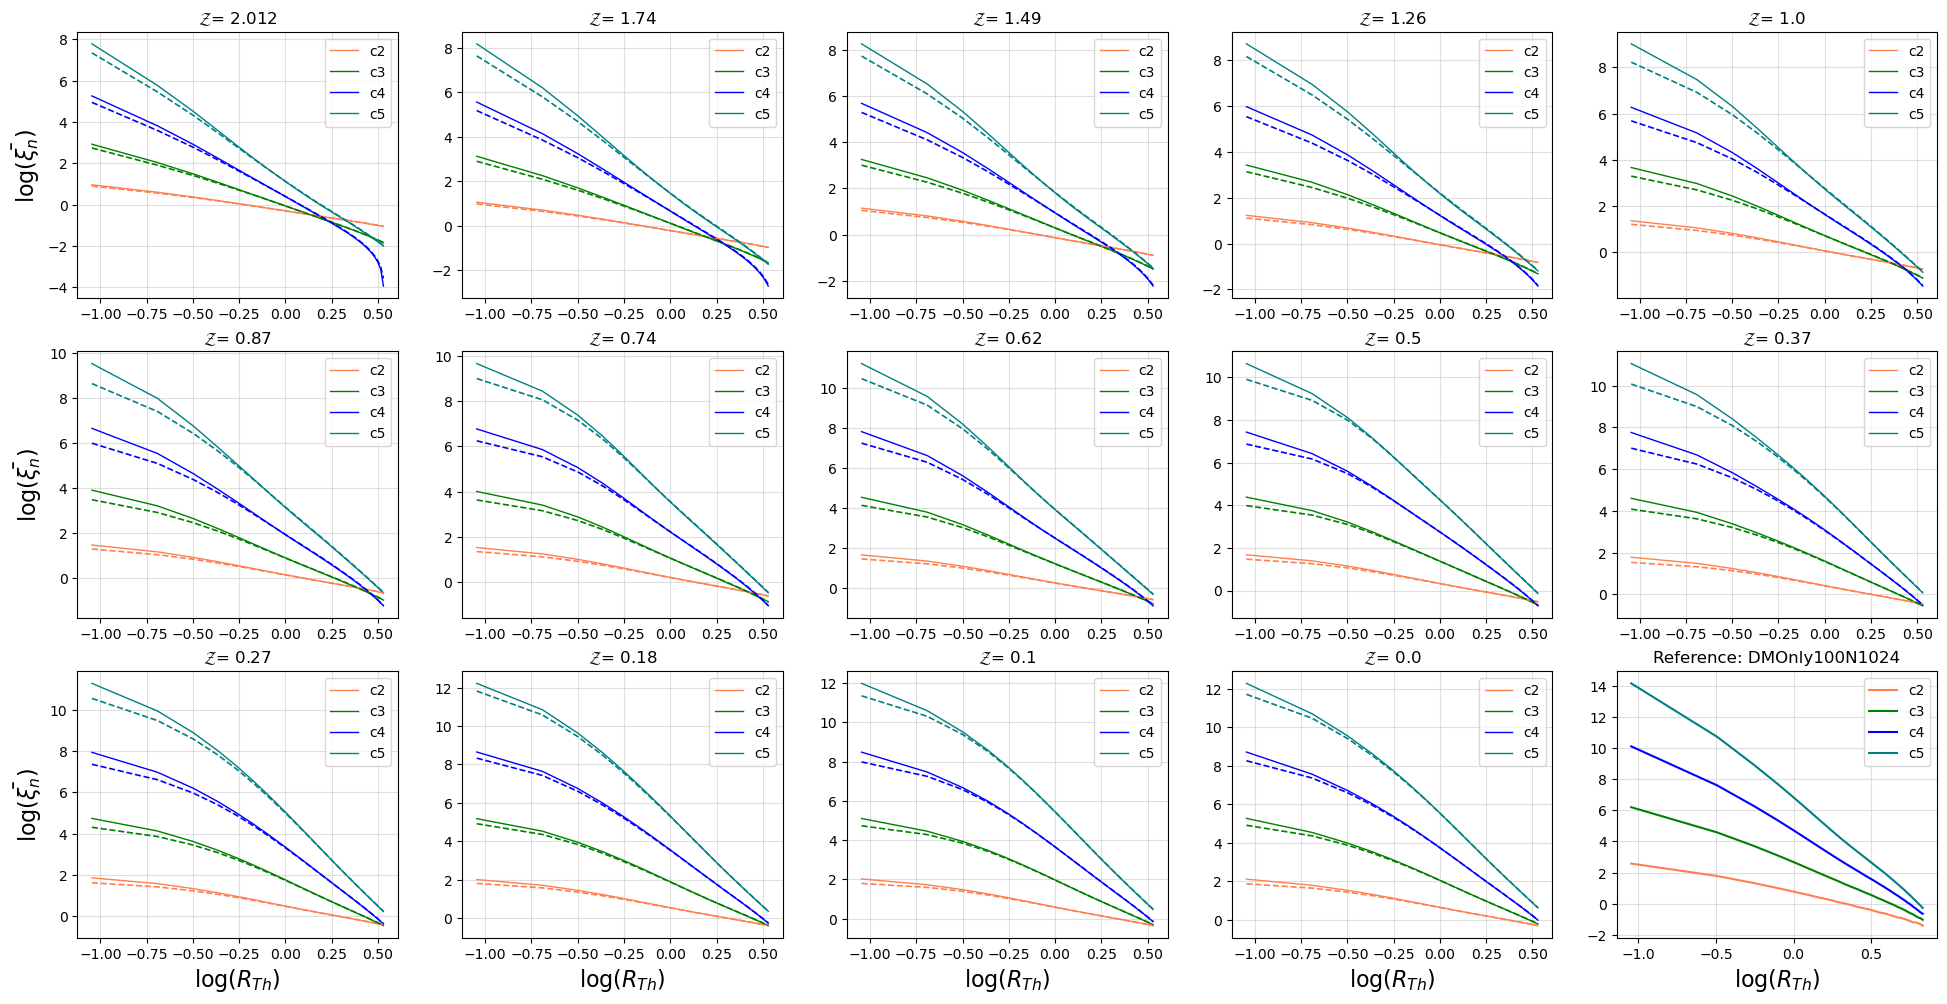

In [19]:
fig, ax = plt.subplots(3,5, figsize=(24,12), dpi=100)

r,c =0,0
for z in enumerate(z_vals):
    #plotting AGNdT8 in solids
    ax[r,c].plot(np.log10(R), np.log10(Master2_Gas[z[0]][0].T[0]), lw=1, color='coral', label='c2')
    ax[r,c].plot(np.log10(R), np.log10(Master3_Gas[z[0]][0].T[0]), lw=1, color='green', label='c3')
    ax[r,c].plot(np.log10(R), np.log10(Master4_Gas[z[0]][0].T[0]), lw=1, color='blue',  label='c4')
    ax[r,c].plot(np.log10(R), np.log10(Master5_Gas[z[0]][0].T[0]), lw=1, color='teal',  label='c5')

    # plotting cumlants of AGNdT9 in dashed lines
    ax[r,c].plot(np.log10(R), np.log10(Master2_Gas[z[0]][1].T[0]),ls='--', lw=1.2, color='coral')
    ax[r,c].plot(np.log10(R), np.log10(Master3_Gas[z[0]][1].T[0]),ls='--', lw=1.2, color='green')
    ax[r,c].plot(np.log10(R), np.log10(Master4_Gas[z[0]][1].T[0]),ls='--', lw=1.2, color='blue')
    ax[r,c].plot(np.log10(R), np.log10(Master5_Gas[z[0]][1].T[0]),ls='--', lw=1.2, color='teal')

    ax[r,c].grid(alpha=0.4)
    ax[r,c].legend()
    ax[r,c].set_title("$\\mathcal{Z}$= "+str(z[1]), fontsize=12)
    # adding axis labels
    if c==0:
        ax[r,c].set_ylabel('log($\\bar{\\xi_n}$)', fontsize=16)
    if r==2:
        ax[r,c].set_xlabel('log($R_{Th}$)', fontsize=16)

    # updating row and column index
    c+=1
    if c==5:
        r+=1
        c=0


#plotting refernece data
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c2.T[0][:]), color='coral', label='c2');
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c3.T[0][:]), color='green', label='c3');
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c4.T[0][:]), color='blue', label='c4');
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c5.T[0][:]), color='teal', label='c5');
ax[2,4].legend()
# ax[2,4].set_xlim(right=0.1)
# ax[2,4].set_ylim(bottom=-14)
ax[2,4].grid(alpha=0.4)
ax[2,4].set_title("Reference: DMOnly100N1024", fontsize=12)
ax[2,4].set_xlabel('log($R_{Th}$)', fontsize=16)

# fig.suptitle('Cumlants of AGNdT8/9 from Gas', fontsize=20)
# fig.subplots_adjust(top=0.91)

# plt.savefig('Plots/Cumlants_Gas_AGNdT8_9.jpg', dpi=150, bbox_inches='tight')

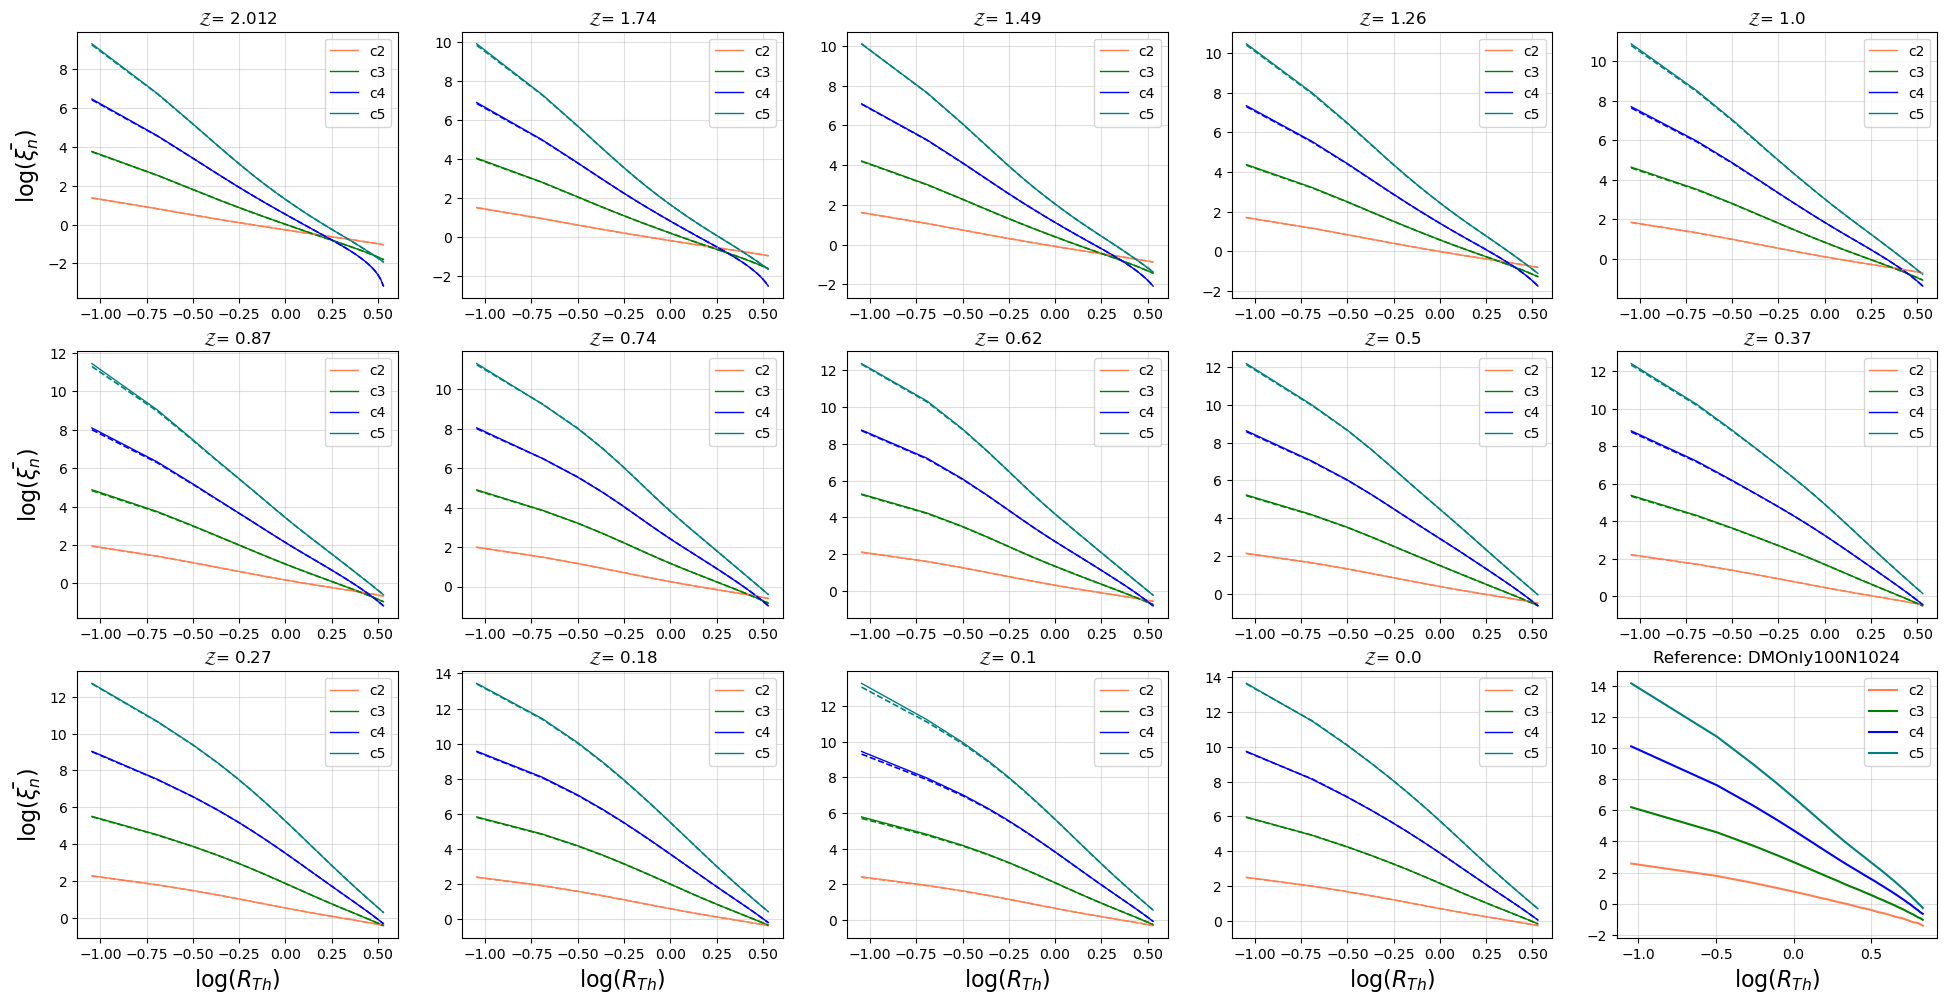

In [20]:
fig, ax = plt.subplots(3,5, figsize=(24,12), dpi=100)

r,c =0,0
for z in enumerate(z_vals):
    #plotting AGNdT8 in solids
    ax[r,c].plot(np.log10(R), np.log10(Master2_DM[z[0]][0].T[0]),lw=1, color='coral', label='c2')
    ax[r,c].plot(np.log10(R), np.log10(Master3_DM[z[0]][0].T[0]),lw=1, color='green', label='c3')
    ax[r,c].plot(np.log10(R), np.log10(Master4_DM[z[0]][0].T[0]),lw=1, color='blue', label='c4')
    ax[r,c].plot(np.log10(R), np.log10(Master5_DM[z[0]][0].T[0]),lw=1, color='teal', label='c5')

    # plotting cumlants of AGNdT9 in dashed lines
    ax[r,c].plot(np.log10(R), np.log10(Master2_DM[z[0]][1].T[0]),ls='--', lw=1.2, color='coral')
    ax[r,c].plot(np.log10(R), np.log10(Master3_DM[z[0]][1].T[0]),ls='--', lw=1.2, color='green')
    ax[r,c].plot(np.log10(R), np.log10(Master4_DM[z[0]][1].T[0]),ls='--', lw=1.2, color='blue')
    ax[r,c].plot(np.log10(R), np.log10(Master5_DM[z[0]][1].T[0]),ls='--', lw=1.2, color='teal')

    ax[r,c].grid(alpha=0.4)
    ax[r,c].legend()
    ax[r,c].set_title("$\\mathcal{Z}$= "+str(z[1]), fontsize=12)
    # adding axis labels
    if c==0:
        ax[r,c].set_ylabel('log($\\bar{\\xi_n}$)', fontsize=16)
    if r==2:
        ax[r,c].set_xlabel('log($R_{Th}$)', fontsize=16)

    # updating row and column index
    c+=1
    if c==5:
        r+=1
        c=0

#plotting refernece data
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c2.T[0][:]), color='coral', label='c2');
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c3.T[0][:]), color='green', label='c3');
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c4.T[0][:]), color='blue', label='c4');
ax[2,4].plot(np.log10(R_ref[:]), np.log10(Ref_c5.T[0][:]), color='teal', label='c5');
ax[2,4].legend()
# ax[2,4].set_xlim(right=0.1)
# ax[2,4].set_ylim(bottom=-14)
ax[2,4].grid(alpha=0.4)
ax[2,4].set_title("Reference: DMOnly100N1024", fontsize=12)
ax[2,4].set_xlabel('log($R_{Th}$)', fontsize=16)

# fig.suptitle('Cumlants of AGNdT8/9 from DM', fontsize=20)
# fig.subplots_adjust(top=0.91)

plt.savefig('Plots/Cumlants_DM_AGNdT8_9.jpg', dpi=150, bbox_inches='tight')

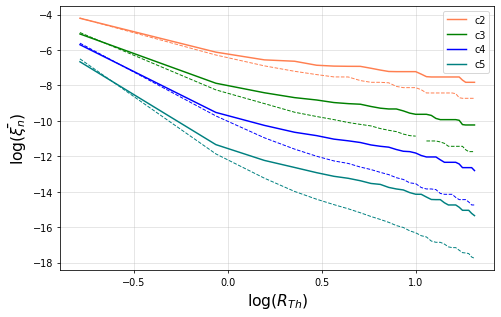

In [28]:
# plotting the reference cumlants


fig,ax = plt.subplots(1,1, figsize=(8,5), dpi=70)
ax.set_xlabel('log($R_{Th}$)', fontsize=16)
ax.set_ylabel('log($\\bar{\\xi_n}$)', fontsize=16)

ax.plot(np.log10(R_ref[:]), np.log10(Ref_c2.T[0][:]), color='coral', label='c2');
ax.plot(np.log10(R_ref[:]), np.log10(Ref_c3.T[0][:]), color='green', label='c3');
ax.plot(np.log10(R_ref[:]), np.log10(Ref_c4.T[0][:]), color='blue', label='c4');
ax.plot(np.log10(R_ref[:]), np.log10(Ref_c5.T[0][:]), color='teal', label='c5');

ax.plot(np.log10(R_ref[:]), np.log10(Ref_g_c2.T[0][:]), ls='--', lw=1, color='coral')
ax.plot(np.log10(R_ref[:]), np.log10(Ref_g_c3.T[0][:]), ls='--', lw=1, color='green')
ax.plot(np.log10(R_ref[:]), np.log10(Ref_g_c4.T[0][:]), ls='--', lw=1, color='blue',)
ax.plot(np.log10(R_ref[:]), np.log10(Ref_g_c5.T[0][:]), ls='--', lw=1, color='teal',)

ax.legend()
# ax.set_xlim(right=0.1)
# ax.set_ylim(bottom=-14)
ax.grid(alpha=0.4)

# plt.savefig('Plots/Cumlants_ref_TNG300-1.jpg', dpi=200, bbox_inches='tight')

In [29]:
E_15 = glob.glob("Cumlants/*s15_est.hdf5")
E_16 = glob.glob("Cumlants/*s16_est.hdf5")
E_17 = glob.glob("Cumlants/*s17_est.hdf5")
E_18 = glob.glob("Cumlants/*s18_est.hdf5")
E_19 = glob.glob("Cumlants/*s19_est.hdf5")
E_20 = glob.glob("Cumlants/*s20_est.hdf5")
E_21 = glob.glob("Cumlants/*s21_est.hdf5")
E_22 = glob.glob("Cumlants/*s22_est.hdf5")
E_23 = glob.glob("Cumlants/*s23_est.hdf5")
E_24 = glob.glob("Cumlants/*s24_est.hdf5")
E_25 = glob.glob("Cumlants/*s25_est.hdf5")
E_26 = glob.glob("Cumlants/*s26_est.hdf5")
E_27 = glob.glob("Cumlants/*s27_est.hdf5")
E_28 = glob.glob("Cumlants/*s28_est.hdf5")

In [44]:
f = h5.File(E_28[0], 'r') # AGNdT8 at z=0
# f.keys()

In [38]:
keys = ['0.09011968085106382', '0.5', '1', '1.5', '2', '2.5', '3', '3.3885']
edges = f[keys[7]]['Gas']['edges'][:]
hist  = f[keys[7]]['Gas']['hist'][:]

#creating an array storing mean location between edges
from tqdm import tqdm
mean_loc = np.zeros(len(edges)-1)
for i in tqdm(range(len(edges)-1)):
    mean_loc[i] = (edges[i]+edges[i+1])/2

100%|██████████| 2500/2500 [00:00<00:00, 358205.86it/s]


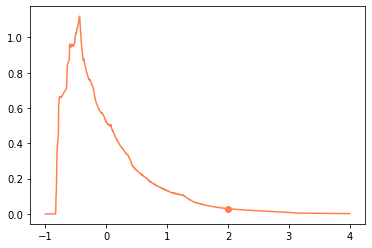

In [39]:
plt.plot(mean_loc, hist, color='coral')
plt.scatter(mean_loc[-1000], hist[-1000], color='coral')
# plt.xlim(-1.5,4)
# plt.axhline(y=0, color='black')
# plt.xscale('log')

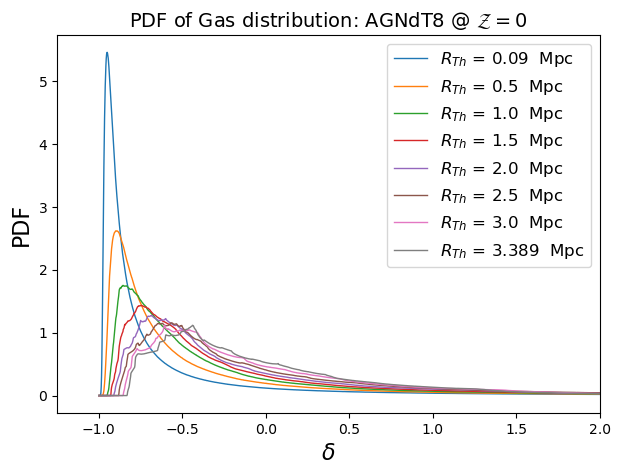

In [45]:
# plotting the disity distribution


plt.figure(figsize=(7,5), dpi=100)
for i in range(8):
    edges = f[keys[i]]['Gas']['edges'][:]
    hist  = f[keys[i]]['Gas']['hist'][:]
    for j in range(len(edges)-1):
        mean_loc[j] = (edges[j]+edges[j+1])/2
    plt.plot(mean_loc, hist, lw=1, label='$R_{Th}$ = ' + str(round(float(keys[i]),3)) + '  Mpc')
plt.legend(fontsize=12)
plt.xlim(right=2)

plt.xlabel('$\\delta$', fontsize=16)
plt.ylabel('PDF', fontsize=16)
plt.title('PDF of Gas distribution: AGNdT8 @ $\\mathcal{Z}=0$', fontsize=14)

# plt.savefig('Plots/PDF_Gas_AGNdT8.jpg', dpi=200, bbox_inches='tight')

# Plotting the PDF of a given file, with theoretical PDF from first 5 moments

In [201]:
from statsmodels.sandbox.distributions.extras import pdf_mvsk

In [202]:
np.shape(Master3_DM)

(14, 2, 30, 2)

In [203]:
# geting the mean variance skewness and kustosis of the AGNdT8 at the biggest smoothing radius
mean = 0
var = Master2_DM[-1][0].T[0][-1]
skew = Master3_DM[-1][0].T[0][-1]
kurt = (Master4_DM[-1][0].T[0][-1] + 3*var**2)/var**2 - 3
print("Mean: ", mean)
print("Variance: ", var)
print("Skewness: ", skew)
print("Kurtosis: ", kurt)

Mean:  0
Variance:  0.5166059
Skewness:  0.6546198
Kurtosis:  4.03550043279647


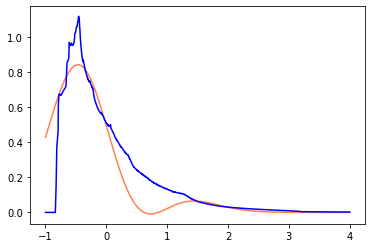

In [204]:
x_vals = np.linspace(-1,4,1000)
pdf = pdf_mvsk([-0.4, var, skew, kurt])
plt.plot(x_vals, pdf(x_vals), color='coral')
plt.plot(mean_loc, hist, color='blue')

# Ploting the PDF of the Refence data

In [46]:
# reading TNG300-1 cumlant data
f1 = h5.File("Cum_TNG300-1_est.hdf5", 'r')
f1.keys()

<KeysViewHDF5 ['10', '15', '2', '20', '25', '6']>

In [48]:
edges = f1['6']['DM']['edges'][:]
hist  = f1['6']['DM']['hist'][:]

In [49]:
#creating an array storing mean location between edges
from tqdm import tqdm
mean_loc = np.zeros(len(edges)-1)
for i in tqdm(range(len(edges)-1)):
    mean_loc[i] = (edges[i]+edges[i+1])/2
    

100%|██████████| 7650/7650 [00:00<00:00, 72677.42it/s]


(-0.025, 0.025)

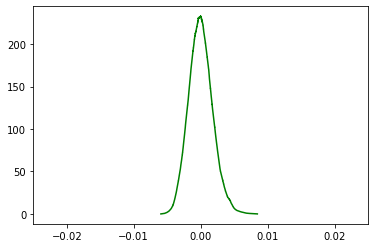

In [50]:
plt.plot(mean_loc, hist, color='green')
plt.xlim(-0.025,0.025)

In [51]:
# computing the area under the curve
from scipy.integrate import simps
area = simps(hist, mean_loc)
print("Area: ", area)

Area:  0.9999999868780592
